In [ ]:
import tensorflow as tf
print(tf.__version__)
!python --version

2.8.0
Python 3.7.13


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

In [ ]:
#MNIST 데이터셋을 로드.
(X_train_, y_train_), (X_test_, y_test_) = mnist.load_data()
# (학습 입력값,결과값 ), (테스트 입력값,결과값 )
# 하나의 데이터를 샘플이라고 하면
# 위의 변수들은 각각 60000x784, 60000x1, 10000x784, 10000x1의 크기로 각각이 2, 1차원 배열로 되어 있다.

11501568/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train = X_train_.astype('float32') / 255
X_test = X_test_.astype('float32') / 255
#0~1사이의 값으로 바꾸겠다.(float32로 정규화)
#keras는 데이터를 0과 1 사이의 입력값이 적합하니 먼저 float type으로 변환

In [ ]:
y_train = to_categorical(y_train_, 10)
y_test = to_categorical(y_test_, 10)
# 각 숫자별로 카테고리 클래스 분류를 한다(원핫 인코딩 방식).

In [ ]:
X_train = np.reshape(X_train,(60000, 784))
#                       6만개  샘플크기,    실수형 변환,   0~1.0 크기로 변경
X_test = np.reshape(X_test,(10000, 784))
#                       1만개  샘플크기 ,   실수형  변환,  0~1.0 크기로 변경
# 샘플당 크기는 784Byte, 정수 자료이다.
# 참고로, mnist에서 제공하는 손글씨 샘플 하나당 이미지 크기는 28*28(=784)바이트

# == 3차원 배열 형식이기에 28 * 28 == 784 * 60000, 10000의 2차원 배열로 변경.

In [ ]:
import keras
class history_loss(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.losses = []

  def on_batch_end(self, batch, logs={}):
    self.losses.append(logs.get('loss'))

#실행할때마다 예측한 것이 원래값보다 얼마만큼 잘못예측하였는지 기록(콜백)해주는 함수정의

In [ ]:
n_epochs = 20
#총 훈련 횟수를 정의
batch_size = 256
#각 데이터의 size 한번에 읽어들이는 데이터 수 //샘플 256개씩 학습/갱신

validation_split = 0.2
#훈련용 데이터셋과 테스트 테이터셋을 8:2로 사용하여 모델을 평가.

In [ ]:
nn_sigmoid = Sequential() # 순차적인 다층 구조 모델이 가능한 빈 모델 생성 

                          # 각 층은 한 처리부만 존재하고 다음 층에 처리 결과 전달

                          # 한 층에서 여러 처리부를 사용하려면 Graph() 모델 사용.

                          # 단, Graph() 모델은 층 생성 함수가 다르다. 
nn_sigmoid.add(Dense(700, input_dim = 784, activation = 'sigmoid'))
#입력층 784 // 은닉층 700 //sigmoid 함수 모델
nn_sigmoid.add(Dense(700, activation = 'sigmoid'))
nn_sigmoid.add(Dense(700, activation = 'sigmoid'))
nn_sigmoid.add(Dense(700, activation = 'sigmoid'))
nn_sigmoid.add(Dense(700, activation = 'sigmoid'))
nn_sigmoid.add(Dense(350, activation = 'sigmoid'))
nn_sigmoid.add(Dense(100, activation = 'sigmoid'))
#인자 700 350 100의 sigmoid 함수를 사용하는 은닉층 추가. 
nn_sigmoid.add(Dense(10, activation = 'softmax'))
# 인자 10 의 softmax 함수를 사용하는 출력층 추가.
# softmax == 출력의 합이 1이다.

In [ ]:
nn_sigmoid.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#                     손실 처리=다중분류,      최적화 방법='sgd,   측정 기준=정확도  (sgd: 확률적 경사하강법)
#3. 모델 엮기 : '네트워크가 학습할 준비가 되었습니다.'라는 의미

In [ ]:
nn_relu = Sequential()
nn_relu.add(Dense(700, input_dim = 784, activation = 'relu'))
#입력층 784 // 은닉층 700 //relu 함수 모델
nn_relu.add(Dense(700, activation = 'relu'))
nn_relu.add(Dense(700, activation = 'relu'))
nn_relu.add(Dense(700, activation = 'relu'))
nn_relu.add(Dense(700, activation = 'relu'))
nn_relu.add(Dense(350, activation = 'relu'))
nn_relu.add(Dense(100, activation = 'relu'))
#인자 700 350 100의 relu 함수를 사용하는 은닉층 추가. 
nn_relu.add(Dense(10, activation = 'softmax'))
# 인자 10 의 softmax 함수를 사용하는 출력층 추가.
# softmax == 출력의 합이 1이다.

In [ ]:
nn_relu.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#                     손실 처리=다중분류,      최적화 방법='sgd,   측정 기준=정확도  (sgd: 확률적 경사하강법)
#3. 모델 엮기 : '네트워크가 학습할 준비가 되었습니다.'라는 의미

In [ ]:
nn_elu = Sequential()
nn_elu.add(Dense(700, input_dim = 784, activation = 'elu'))
#입력층 784 // 은닉층 700 //elu 함수 모델
nn_elu.add(Dense(700, activation = 'elu'))
nn_elu.add(Dense(700, activation = 'elu'))
nn_elu.add(Dense(700, activation = 'elu'))
nn_elu.add(Dense(700, activation = 'elu'))
nn_elu.add(Dense(350, activation = 'elu'))
nn_elu.add(Dense(100, activation = 'elu'))
#인자 700 350 100의 relu 함수를 사용하는 은닉층 추가. 
nn_elu.add(Dense(10, activation = 'softmax'))
# 인자 10 의 softmax 함수를 사용하는 출력층 추가.
# softmax == 출력의 합이 1이다.

In [ ]:
nn_elu.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#                     손실 처리=다중분류,      최적화 방법='sgd,   측정 기준=정확도  (sgd: 확률적 경사하강법)
#3. 모델 엮기 : '네트워크가 학습할 준비가 되었습니다.'라는 의미

In [ ]:
history_sigmoid = history_loss()
nn_sigmoid.fit(X_train, y_train, epochs = n_epochs, batch_size = batch_size,
                callbacks = [history_sigmoid], validation_split=validation_split, verbose=2)


#acc는 accuracy '정확도'라는 뜻으로 값이 1에 가깝고 높을 수록 좋은 모델
#loss는 결과 값과의 차이를 의미하므로 작을 수록 좋고 0.0000000....에 수렴할수록 좋은 모델


#- loss : 훈련 손실값
#- acc : 훈련 정확도
#- val_loss : 검증 손실값
#- val_acc : 검증 정확도


Epoch 1/20
188/188 - 4s - loss: 2.3288 - accuracy: 0.1080 - val_loss: 2.3026 - val_accuracy: 0.1060 - 4s/epoch - 22ms/step
Epoch 2/20
188/188 - 2s - loss: 2.3013 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060 - 2s/epoch - 8ms/step
Epoch 3/20
188/188 - 2s - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3026 - val_accuracy: 0.1060 - 2s/epoch - 8ms/step
Epoch 4/20
188/188 - 2s - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060 - 2s/epoch - 9ms/step
Epoch 5/20
188/188 - 2s - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3023 - val_accuracy: 0.1060 - 2s/epoch - 8ms/step
Epoch 6/20
188/188 - 2s - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3018 - val_accuracy: 0.1060 - 2s/epoch - 8ms/step
Epoch 7/20
188/188 - 2s - loss: 2.3013 - accuracy: 0.1140 - val_loss: 2.3023 - val_accuracy: 0.1060 - 2s/epoch - 8ms/step
Epoch 8/20
188/188 - 2s - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3022 - val_accuracy: 0.1060 - 2s/epoch - 9ms/step
Epoch 9/20
188/188 - 1s

In [ ]:
history_relu = history_loss()
nn_relu.fit(X_train, y_train, epochs = n_epochs, batch_size = batch_size,
                callbacks = [history_relu], validation_split=validation_split, verbose=2)

Epoch 1/20
188/188 - 3s - loss: 2.2450 - accuracy: 0.3462 - val_loss: 2.1190 - val_accuracy: 0.5231 - 3s/epoch - 14ms/step
Epoch 2/20
188/188 - 2s - loss: 1.5623 - accuracy: 0.6355 - val_loss: 0.8537 - val_accuracy: 0.8155 - 2s/epoch - 9ms/step
Epoch 3/20
188/188 - 2s - loss: 0.6131 - accuracy: 0.8378 - val_loss: 0.4464 - val_accuracy: 0.8648 - 2s/epoch - 9ms/step
Epoch 4/20
188/188 - 2s - loss: 0.4123 - accuracy: 0.8806 - val_loss: 0.3642 - val_accuracy: 0.8932 - 2s/epoch - 8ms/step
Epoch 5/20
188/188 - 2s - loss: 0.3381 - accuracy: 0.9025 - val_loss: 0.3070 - val_accuracy: 0.9091 - 2s/epoch - 8ms/step
Epoch 6/20
188/188 - 2s - loss: 0.2996 - accuracy: 0.9135 - val_loss: 0.2660 - val_accuracy: 0.9224 - 2s/epoch - 8ms/step
Epoch 7/20
188/188 - 2s - loss: 0.2731 - accuracy: 0.9209 - val_loss: 0.2459 - val_accuracy: 0.9283 - 2s/epoch - 9ms/step
Epoch 8/20
188/188 - 2s - loss: 0.2492 - accuracy: 0.9270 - val_loss: 0.2245 - val_accuracy: 0.9357 - 2s/epoch - 8ms/step
Epoch 9/20
188/188 - 2s

In [ ]:
history_elu = history_loss()
nn_elu.fit(X_train, y_train, epochs = n_epochs, batch_size = batch_size,
                callbacks = [history_elu], validation_split=validation_split, verbose=2)

Epoch 1/20
188/188 - 3s - loss: 0.8253 - accuracy: 0.7978 - val_loss: 0.4202 - val_accuracy: 0.8848 - 3s/epoch - 14ms/step
Epoch 2/20
188/188 - 2s - loss: 0.3903 - accuracy: 0.8901 - val_loss: 0.3294 - val_accuracy: 0.9060 - 2s/epoch - 9ms/step
Epoch 3/20
188/188 - 2s - loss: 0.3297 - accuracy: 0.9041 - val_loss: 0.2961 - val_accuracy: 0.9153 - 2s/epoch - 8ms/step
Epoch 4/20
188/188 - 2s - loss: 0.2987 - accuracy: 0.9128 - val_loss: 0.2781 - val_accuracy: 0.9198 - 2s/epoch - 8ms/step
Epoch 5/20
188/188 - 2s - loss: 0.2779 - accuracy: 0.9194 - val_loss: 0.2581 - val_accuracy: 0.9269 - 2s/epoch - 9ms/step
Epoch 6/20
188/188 - 2s - loss: 0.2621 - accuracy: 0.9243 - val_loss: 0.2461 - val_accuracy: 0.9279 - 2s/epoch - 9ms/step
Epoch 7/20
188/188 - 2s - loss: 0.2481 - accuracy: 0.9272 - val_loss: 0.2353 - val_accuracy: 0.9334 - 2s/epoch - 9ms/step
Epoch 8/20
188/188 - 2s - loss: 0.2355 - accuracy: 0.9307 - val_loss: 0.2248 - val_accuracy: 0.9362 - 2s/epoch - 9ms/step
Epoch 9/20
188/188 - 2s

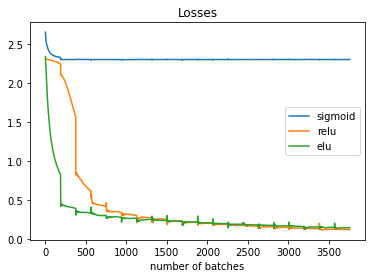

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline
#화면 띄워주는 명령어.
plt.plot(np.arange(len(history_sigmoid.losses)), history_sigmoid.losses, label = 'sigmoid')
plt.plot(np.arange(len(history_relu.losses)), history_relu.losses, label = 'relu')
plt.plot(np.arange(len(history_elu.losses)), history_elu.losses, label = 'elu')
plt.title('Losses')
plt.xlabel('number of batches')
plt.legend(loc='best')
plt.show()